In [ ]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm # Statistical Modelsfit_intercept
import warnings
warnings.simplefilter(action='ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving carprice.csv to carprice (1).csv


In [ ]:
car_price = pd.read_csv("carprice (1).csv")

In [ ]:
# Check the first few records
car_price.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
car_price.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [ ]:
car_price.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
car_price.rename(columns={ 'MSRP':'Target', 'Engine Fuel Type':'Engine_Fuel_Type','Engine HP':'Engine_HP'},inplace=True)

In [ ]:
# Understand the missing values in the columns and types of each of the columns

car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine_Fuel_Type   11911 non-null  object 
 4   Engine_HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  Target             11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
# Descriptive Statistics of the Quantitative Variables
desc = car_price.describe().transpose()
desc.to_csv("Descriptive Statistics.csv")
desc

,count,mean,std,min,25%,50%,75%,max
Year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
Engine_HP,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
Engine Cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
Number of Doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway MPG,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
Popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
Target,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


In [ ]:
car_price.describe(include=['O'])

,Make,Model,Engine_Fuel_Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style
count,11914,11914,11911,11914,11914,8172,11914,11914
unique,48,915,10,5,4,71,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Crossover,Compact,Sedan
freq,1123,156,7172,8266,4787,1110,4764,3048


In [ ]:
car_price.shape

(11914, 16)

In [ ]:
car_price.nunique()

Make                   48
Model                 915
Year                   28
Engine_Fuel_Type       10
Engine_HP             356
Engine Cylinders        9
Transmission Type       5
Driven_Wheels           4
Number of Doors         3
Market Category        71
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
Target               6049
dtype: int64

In [ ]:
cat_columns = car_price.select_dtypes(include='object').columns
num_columns = car_price.select_dtypes(exclude='object').columns
for var in cat_columns: 
    
    print(car_price[var].value_counts())

Chevrolet        1117
Ford              868
Volkswagen        809
Toyota            744
Dodge             626
Nissan            548
GMC               515
Honda             445
Mazda             423
Cadillac          397
Mercedes-Benz     352
Suzuki            348
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               226
Mitsubishi        212
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           156
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            68
Scion              60
FIAT               59
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Name: Make, dtype: int64
regular unleaded                                7142
premium unleaded (required)               

In [ ]:
# Remove the erroneous values - Basic validation exercises

car_price['Engine Cylinders'][car_price['Engine Cylinders']<=0] = np.nan
car_price['highway MPG'][car_price['highway MPG'] > 100] = np.nan
car_price['city mpg'][car_price['city mpg'] > 100] = np.nan

In [ ]:
# Any category with less than 20 observations need to be made blank

for var in cat_columns: 
    
    insuf_Values = car_price[var].value_counts()[car_price[var].value_counts()<20].reset_index()
    car_price[var][car_price[var].isin(insuf_Values["index"])] = np.nan


In [ ]:
# Check the number of missing values in the data
car_price.isnull().sum()

Make                 0
Year                 0
Engine_Fuel_Type     0
Engine_HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
Target               0
dtype: int64

In [ ]:
# Remove unwanted columns
car_price.drop(["Model"],axis=1, inplace = True)
car_price.drop(["Market Category"],axis=1, inplace = True)

In [ ]:
car_price['Engine Cylinders'].fillna(car_price['Engine Cylinders'].min(),inplace = True)
car_price['highway MPG'].fillna(car_price['highway MPG'].max(),inplace = True)
car_price['city mpg'].fillna(car_price['city mpg'].max(),inplace = True)

In [ ]:
car_price['Transmission Type'].value_counts().idxmax()

'AUTOMATIC'

In [ ]:
car_price["Transmission Type"].fillna(car_price['Transmission Type'].value_counts().idxmax(), inplace=True)

In [ ]:
car_price.dropna(axis=0, inplace = True)

In [ ]:
cat_columns = car_price.select_dtypes(include='object').columns
num_columns = car_price.select_dtypes(exclude='object').columns
from itertools import product
cat1 = car_price[cat_columns]
cat2 = car_price[cat_columns]
cat_var_prod = list(product(cat1,cat2, repeat = 1))
cat_var_prod

[('Make', 'Make'),
 ('Make', 'Engine Fuel Type'),
 ('Make', 'Transmission Type'),
 ('Make', 'Driven_Wheels'),
 ('Make', 'Vehicle Size'),
 ('Make', 'Vehicle Style'),
 ('Engine Fuel Type', 'Make'),
 ('Engine Fuel Type', 'Engine Fuel Type'),
 ('Engine Fuel Type', 'Transmission Type'),
 ('Engine Fuel Type', 'Driven_Wheels'),
 ('Engine Fuel Type', 'Vehicle Size'),
 ('Engine Fuel Type', 'Vehicle Style'),
 ('Transmission Type', 'Make'),
 ('Transmission Type', 'Engine Fuel Type'),
 ('Transmission Type', 'Transmission Type'),
 ('Transmission Type', 'Driven_Wheels'),
 ('Transmission Type', 'Vehicle Size'),
 ('Transmission Type', 'Vehicle Style'),
 ('Driven_Wheels', 'Make'),
 ('Driven_Wheels', 'Engine Fuel Type'),
 ('Driven_Wheels', 'Transmission Type'),
 ('Driven_Wheels', 'Driven_Wheels'),
 ('Driven_Wheels', 'Vehicle Size'),
 ('Driven_Wheels', 'Vehicle Style'),
 ('Vehicle Size', 'Make'),
 ('Vehicle Size', 'Engine Fuel Type'),
 ('Vehicle Size', 'Transmission Type'),
 ('Vehicle Size', 'Driven_Whee

In [ ]:
# Chi square Test - To understand whether each pair of categorical variables are independent or interdependent

import scipy.stats as ss
result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            car_price[i[0]], car_price[i[1]])))[1]))
result
chi_test_output = pd.DataFrame(result, columns = ["var1", "var2", "p-values"])
chi_test_output

KeyError: ignored

In [ ]:
# Understand the relationship between the numerical variables
car_price.corr()['Target'].sort_values()

city mpg           -0.245211
highway MPG        -0.225103
Number of Doors    -0.147964
Popularity         -0.038292
Year                0.282362
Engine Cylinders    0.577193
Engine_HP           0.717730
Target              1.000000
Name: Target, dtype: float64

In [ ]:
cat_columns = car_price.select_dtypes(include='object').columns
num_columns = car_price.select_dtypes(exclude='object').columns
for var in cat_columns: 
    
    print(car_price.groupby([var])['Target'].mean().reset_index())

             Make         Target
0           Acura   34887.587302
1    Aston Martin  197910.376344
2            Audi   53452.112805
3             BMW   61546.763473
4         Bentley  247169.324324
5           Buick   28206.612245
6        Cadillac   56231.317380
7       Chevrolet   28292.137869
8        Chrysler   26722.962567
9           Dodge   22390.059105
10           FIAT   22206.016949
11        Ferrari  237383.823529
12           Ford   27393.420507
13            GMC   30493.299029
14          Honda   26623.368539
15        Hyundai   24597.036304
16       Infiniti   42394.212121
17            Kia   25112.389381
18    Lamborghini  331567.307692
19     Land Rover   67823.216783
20          Lexus   47549.069307
21        Lincoln   42494.371795
22          Lotus   69188.275862
23       Maserati  114207.706897
24          Mazda   20039.382979
25  Mercedes-Benz   71537.809659
26     Mitsubishi   21232.259434
27         Nissan   28513.366788
28     Oldsmobile   11542.540000
29       P

## Visualizations

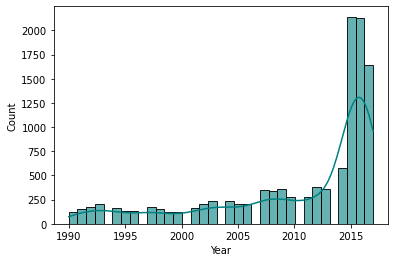

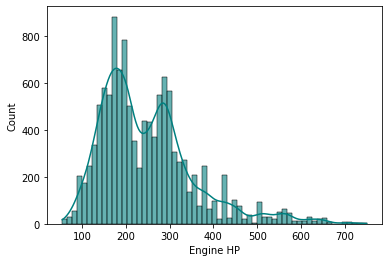

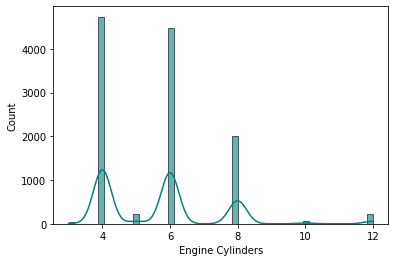

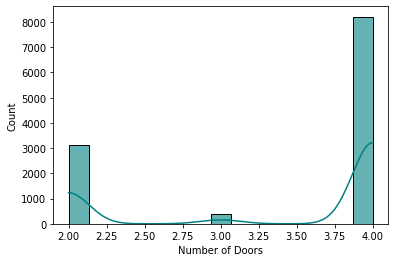

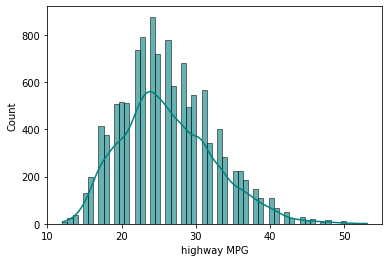

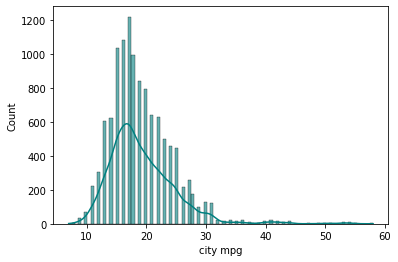

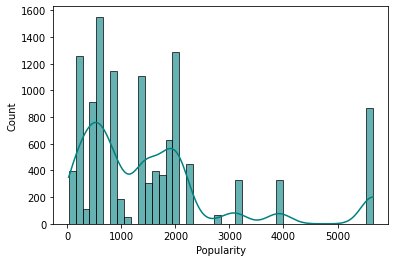

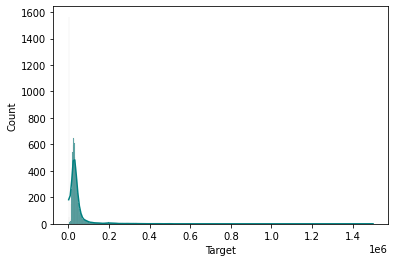

In [ ]:
# Visualizing the numerical Variables

for var in num_columns: 
    plt.figure()
    sns.histplot(data = car_price, x = var, kde = True, color='teal', alpha=0.6)

<Figure size 1080x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

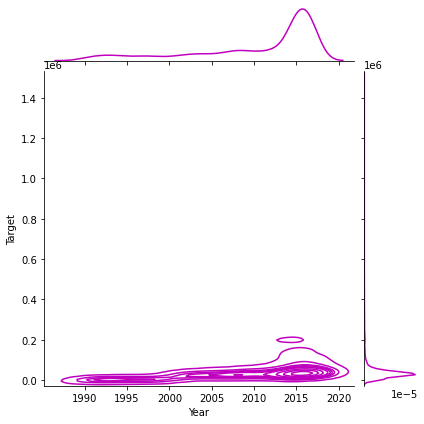

<Figure size 432x288 with 0 Axes>

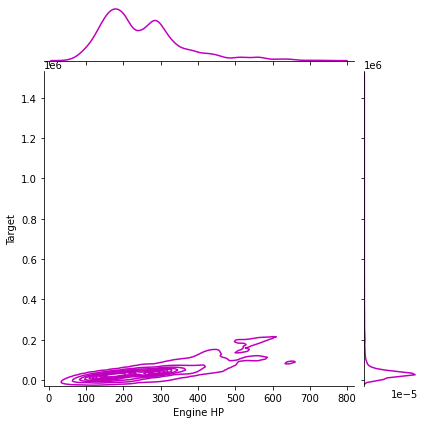

<Figure size 432x288 with 0 Axes>

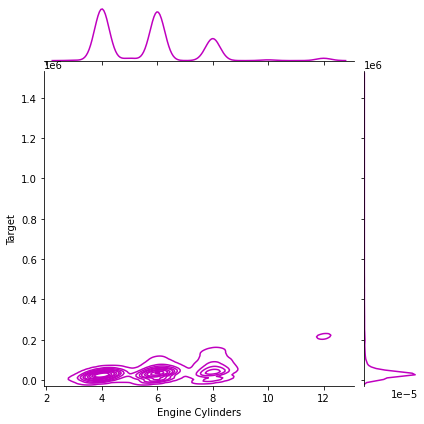

<Figure size 432x288 with 0 Axes>

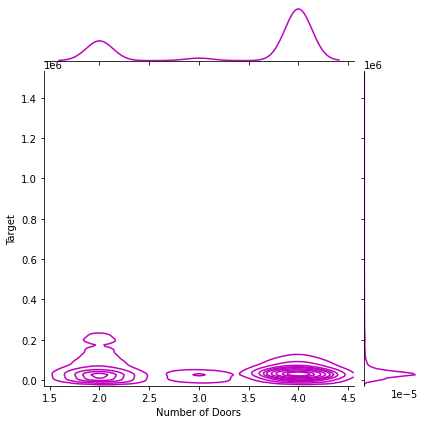

<Figure size 432x288 with 0 Axes>

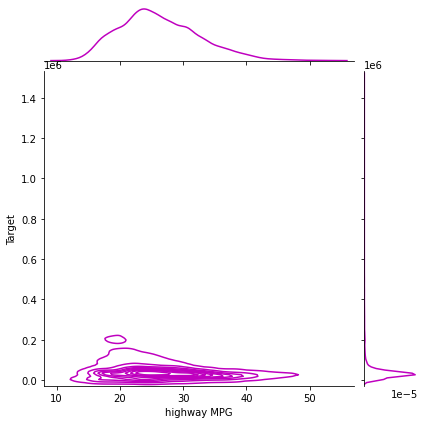

<Figure size 432x288 with 0 Axes>

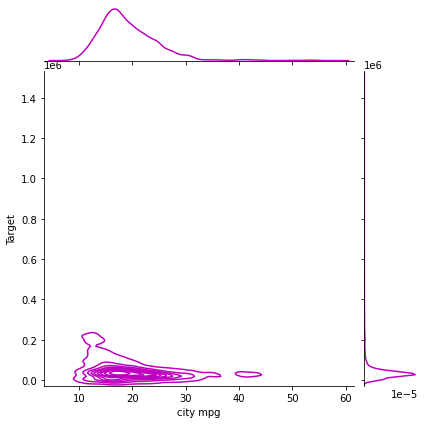

<Figure size 432x288 with 0 Axes>

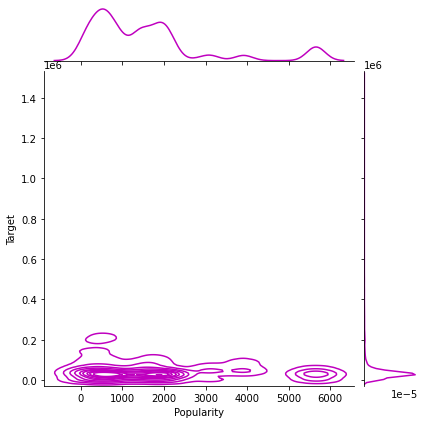

In [ ]:
plt.figure(figsize=(15,8))
for var in num_columns:
    if var == 'Target':
        continue
    plt.figure()
    #sns.kdeplot(data = car_price[car_price.Target == 1], x = var,  color='darkturquoise', shade=True)
    sns.jointplot(x=var, y="Target", data = car_price,kind="kde", color="m")

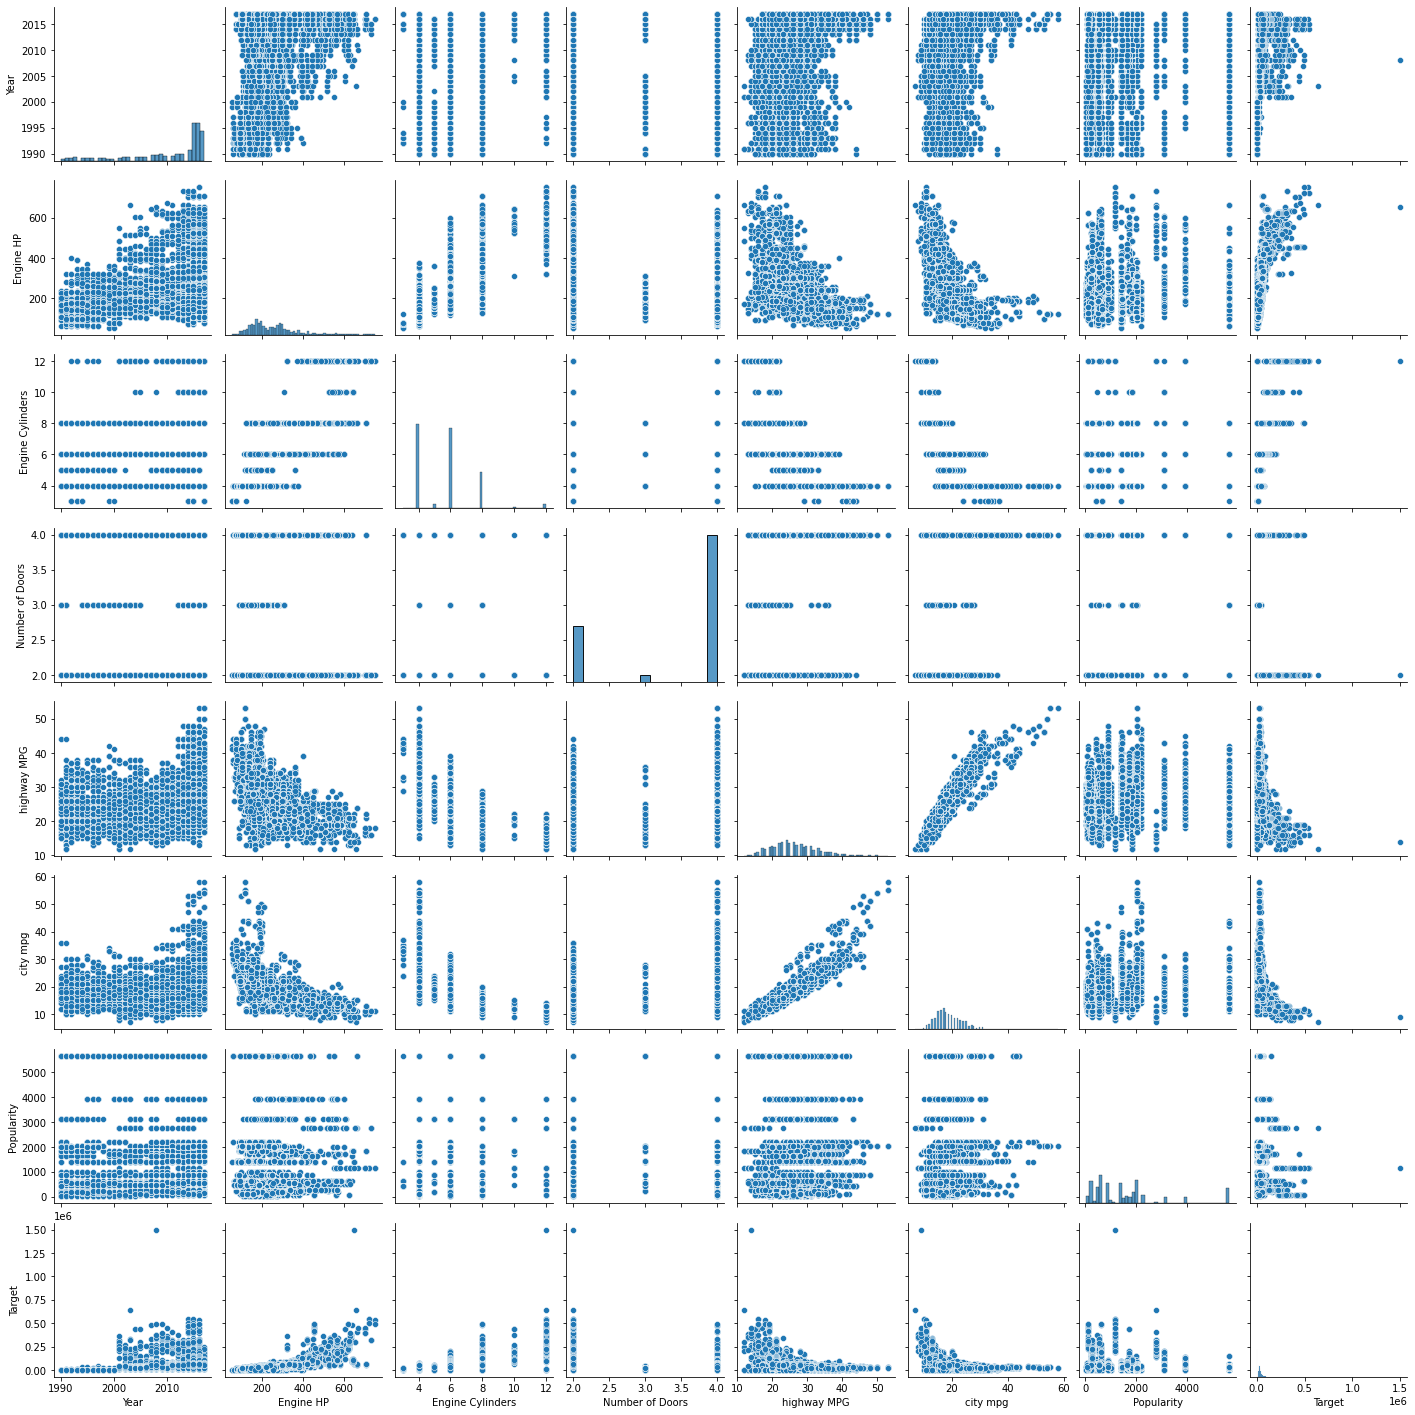

In [ ]:
sns.pairplot(car_price)

<Figure size 432x288 with 0 Axes>

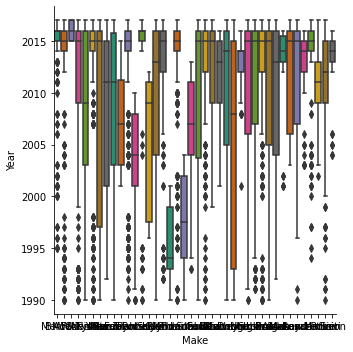

<Figure size 432x288 with 0 Axes>

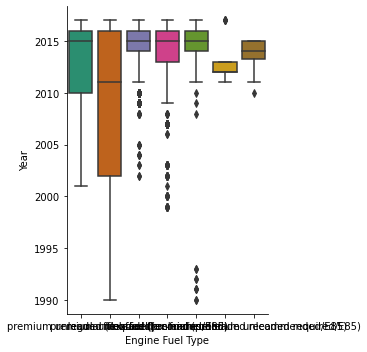

<Figure size 432x288 with 0 Axes>

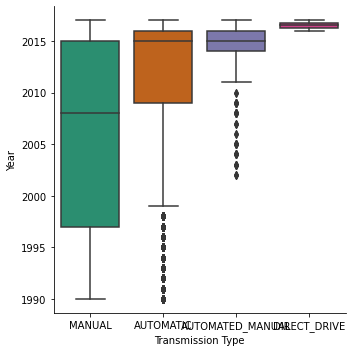

<Figure size 432x288 with 0 Axes>

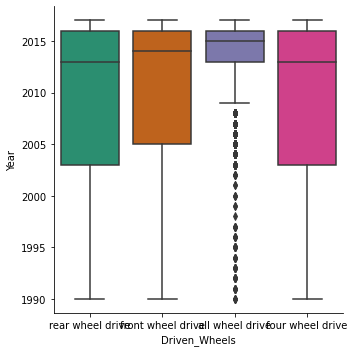

<Figure size 432x288 with 0 Axes>

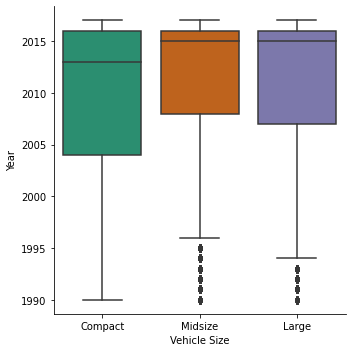

<Figure size 432x288 with 0 Axes>

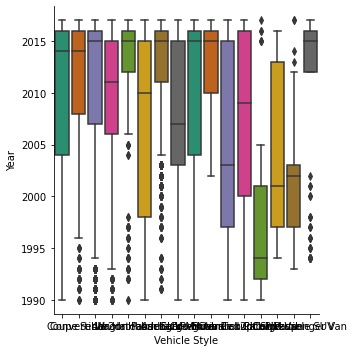

<Figure size 432x288 with 0 Axes>

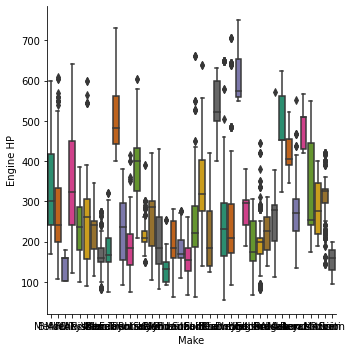

<Figure size 432x288 with 0 Axes>

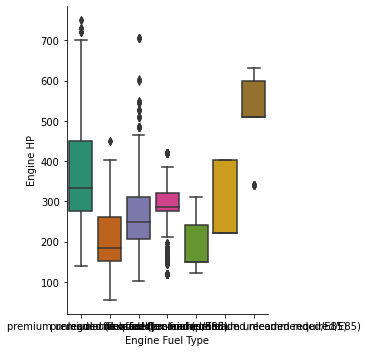

<Figure size 432x288 with 0 Axes>

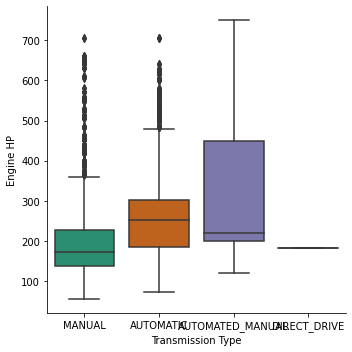

<Figure size 432x288 with 0 Axes>

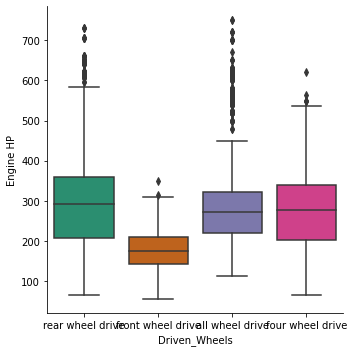

<Figure size 432x288 with 0 Axes>

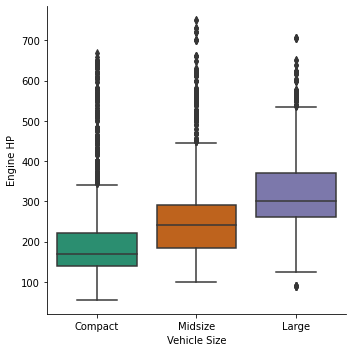

<Figure size 432x288 with 0 Axes>

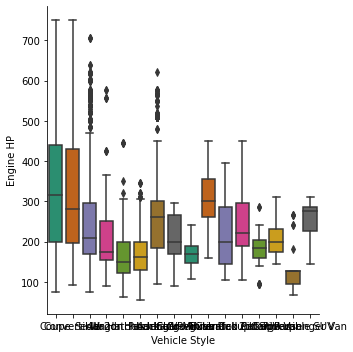

<Figure size 432x288 with 0 Axes>

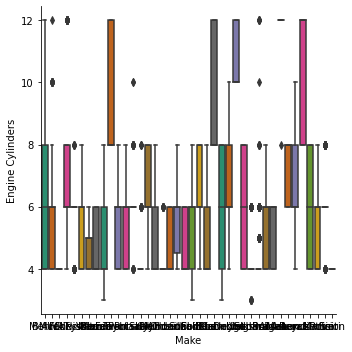

<Figure size 432x288 with 0 Axes>

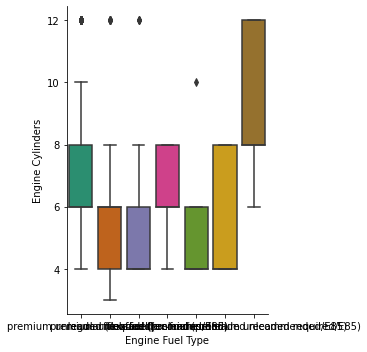

<Figure size 432x288 with 0 Axes>

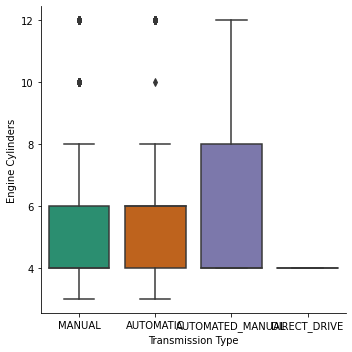

<Figure size 432x288 with 0 Axes>

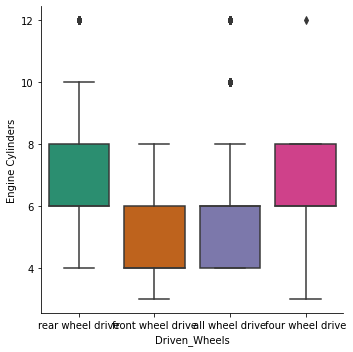

<Figure size 432x288 with 0 Axes>

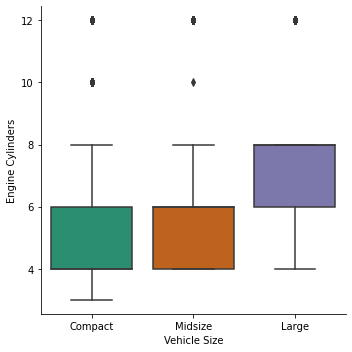

<Figure size 432x288 with 0 Axes>

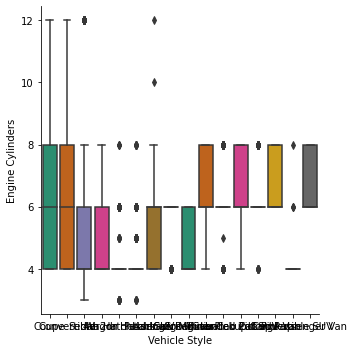

<Figure size 432x288 with 0 Axes>

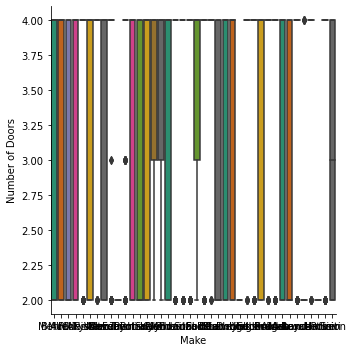

<Figure size 432x288 with 0 Axes>

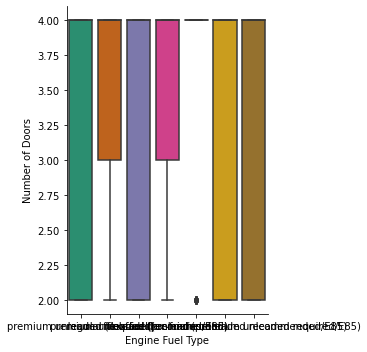

<Figure size 432x288 with 0 Axes>

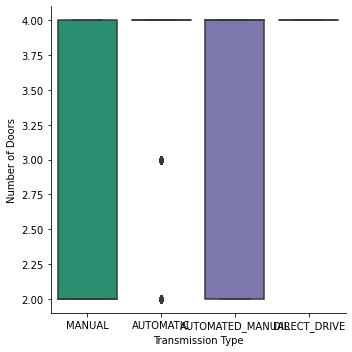

<Figure size 432x288 with 0 Axes>

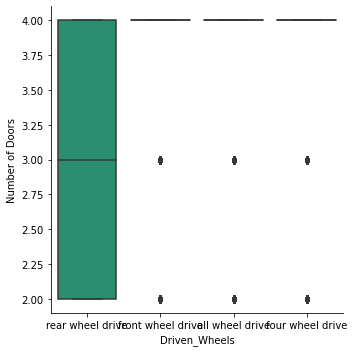

<Figure size 432x288 with 0 Axes>

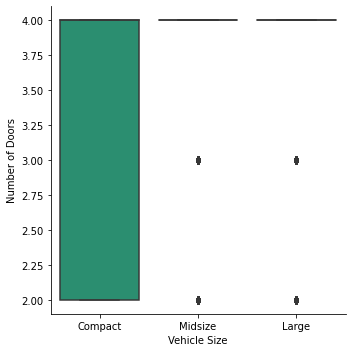

<Figure size 432x288 with 0 Axes>

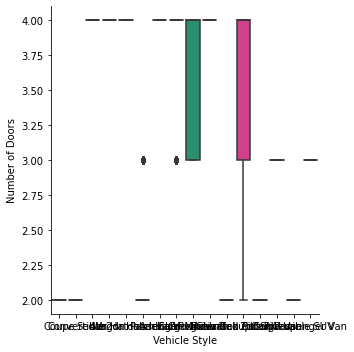

<Figure size 432x288 with 0 Axes>

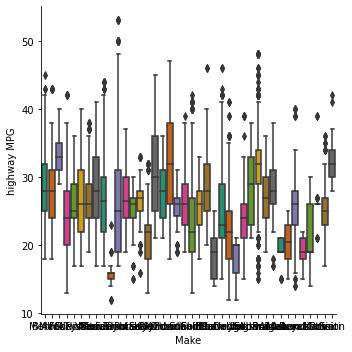

<Figure size 432x288 with 0 Axes>

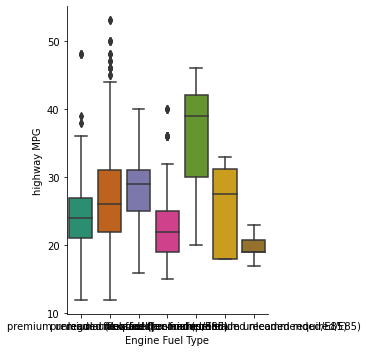

<Figure size 432x288 with 0 Axes>

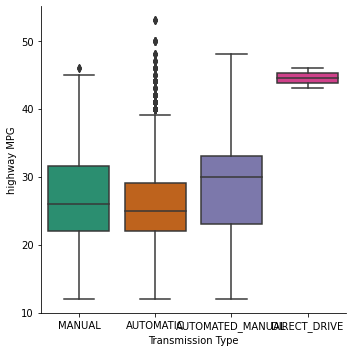

<Figure size 432x288 with 0 Axes>

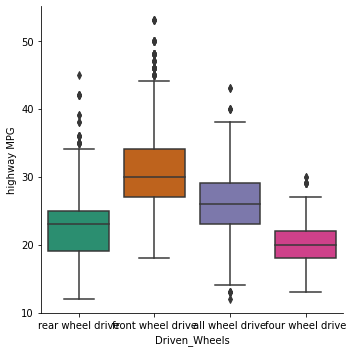

<Figure size 432x288 with 0 Axes>

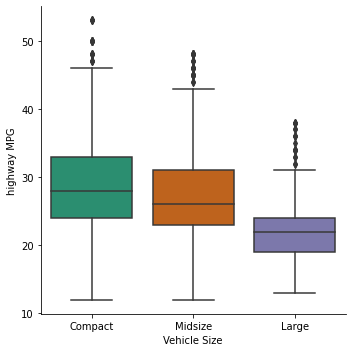

<Figure size 432x288 with 0 Axes>

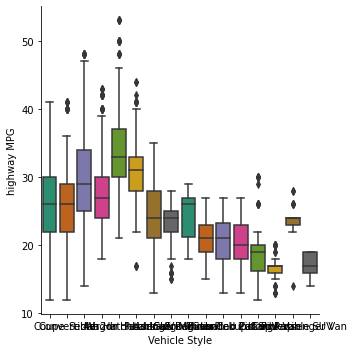

<Figure size 432x288 with 0 Axes>

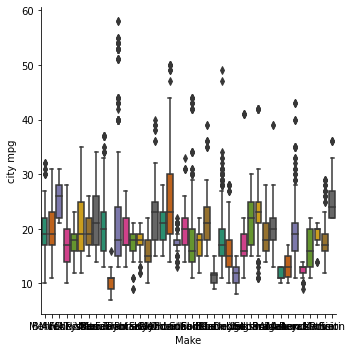

<Figure size 432x288 with 0 Axes>

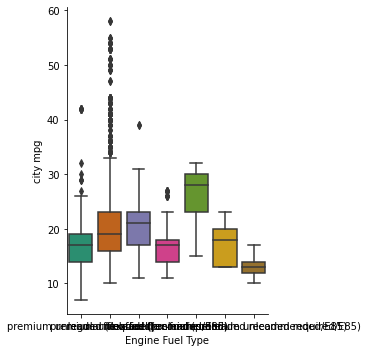

<Figure size 432x288 with 0 Axes>

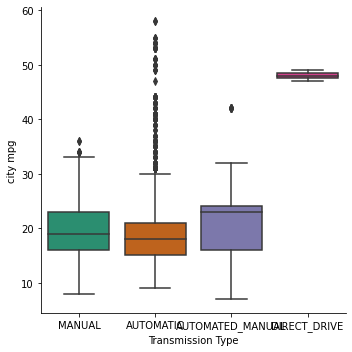

<Figure size 432x288 with 0 Axes>

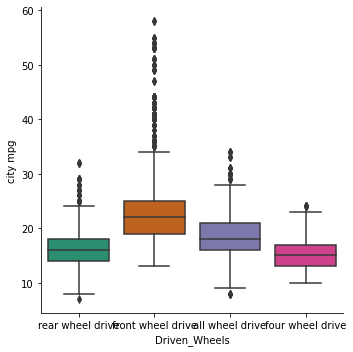

<Figure size 432x288 with 0 Axes>

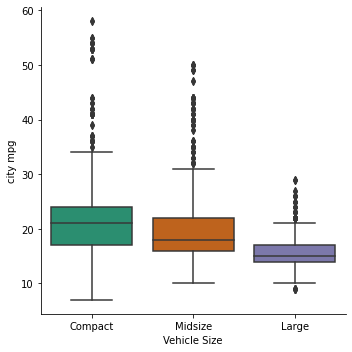

<Figure size 432x288 with 0 Axes>

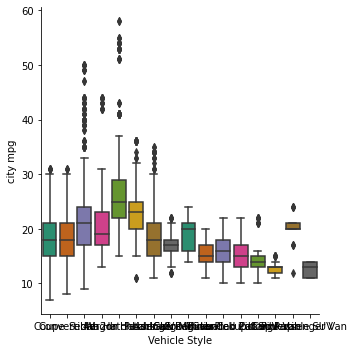

<Figure size 432x288 with 0 Axes>

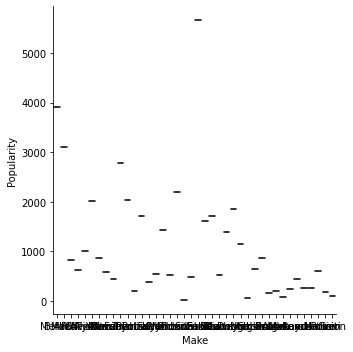

<Figure size 432x288 with 0 Axes>

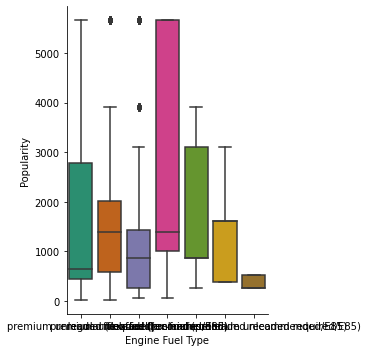

<Figure size 432x288 with 0 Axes>

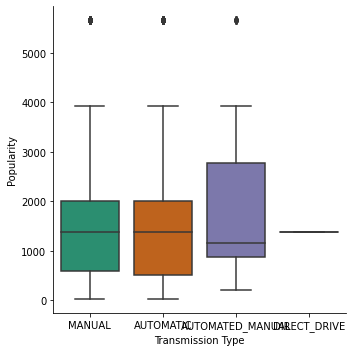

<Figure size 432x288 with 0 Axes>

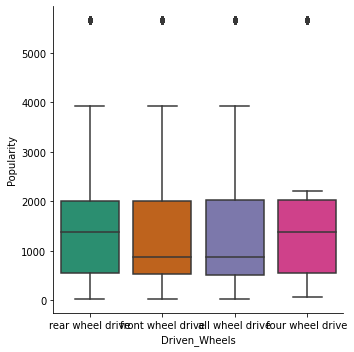

<Figure size 432x288 with 0 Axes>

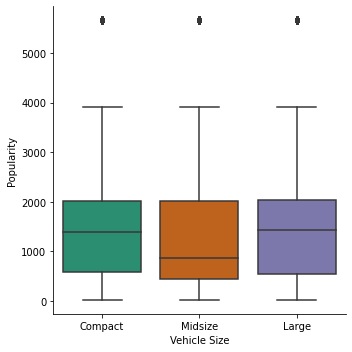

<Figure size 432x288 with 0 Axes>

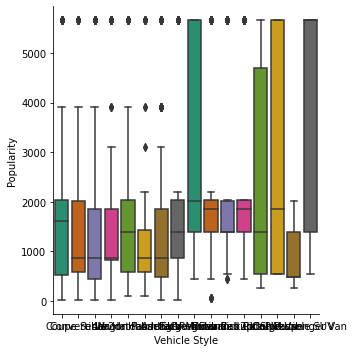

<Figure size 432x288 with 0 Axes>

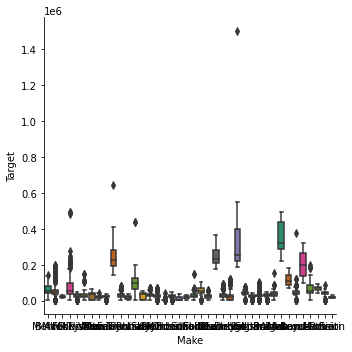

<Figure size 432x288 with 0 Axes>

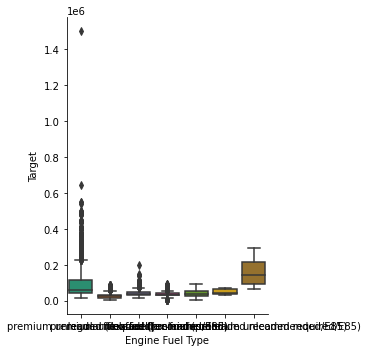

<Figure size 432x288 with 0 Axes>

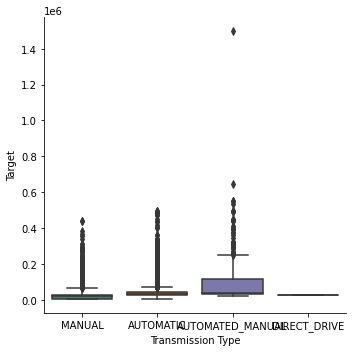

<Figure size 432x288 with 0 Axes>

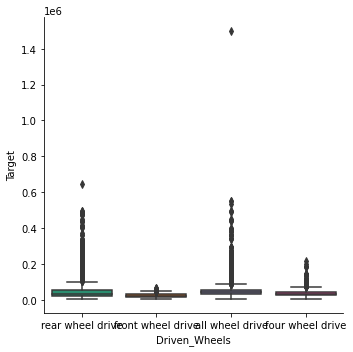

<Figure size 432x288 with 0 Axes>

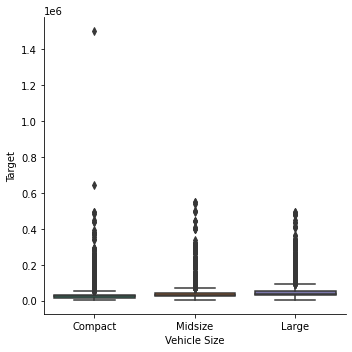

<Figure size 432x288 with 0 Axes>

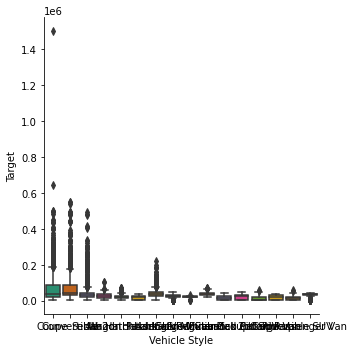

In [ ]:
for var in num_columns: 
    for i in cat_columns:
        plt.figure()
        sns.catplot(x=i,y=var,data=car_price,kind='box',palette='Dark2')   

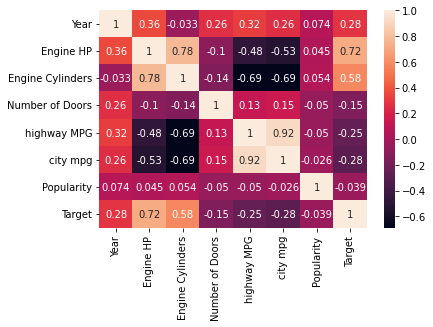

In [ ]:
sns.heatmap(car_price.corr(), annot=True)

In [ ]:
# Do the feature selection mechanisms done in Classification Problems

## Scikit-Learn

In [ ]:
!pip install dmba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 7.2 MB/s 


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, SGDRegressor, ElasticNet, ElasticNetCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PowerTransformer, OneHotEncoder
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error,  explained_variance_score
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

no display found. Using non-interactive Agg backend


In [ ]:
# Separate the Target and the feature variables

X = car_price.drop(["Target"],axis = 1)
y = car_price['Target']


In [ ]:
# Capture the numerical and the categorical features separately

categorical_columns = X.select_dtypes(include='object').columns
numerical_columns = X.select_dtypes(exclude='object').columns

In [ ]:
# Dummy variable creation

X = pd.get_dummies(data = X, prefix = categorical_columns, prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int8')
X

,Year,Engine_HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Make_Aston Martin,Make_Audi,Make_BMW,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26.0,19.0,3916,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28.0,19.0,3916,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28.0,20.0,3916,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28.0,18.0,3916,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28.0,18.0,3916,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,2012,300.0,6.0,4.0,23.0,16.0,204,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11910,2012,300.0,6.0,4.0,23.0,16.0,204,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11911,2012,300.0,6.0,4.0,23.0,16.0,204,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11912,2013,300.0,6.0,4.0,23.0,16.0,204,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Splitting of data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
col_names = X_train.columns

In [ ]:
# You can perform Box Cox or Yeo-Johnson (Non Normal transformation)

bctrans = PowerTransformer(method = 'yeo-johnson').fit(X_train)
X_train = pd.DataFrame(bctrans.transform(X_train),columns = col_names)
X_test = pd.DataFrame(bctrans.transform(X_test),columns = col_names)

#Standardization of the data

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train),columns = col_names)
X_test = pd.DataFrame(scaler.transform(X_test),columns = col_names)
X_train.head()


,Year,Engine_HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,Make_Aston Martin,Make_Audi,Make_BMW,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,0.945260,-0.170857,-1.084679,0.657420,2.324867,2.833537,0.736432,-0.086066,-0.160499,-0.172693,...,-0.268393,-0.047619,-0.339790,-0.243029,-0.236166,-0.189998,-0.108577,-0.183511,1.716516,-0.227772
1,0.616866,0.330151,0.453608,0.657420,-1.001991,-0.782259,0.629317,-0.086066,-0.160499,-0.172693,...,-0.268393,-0.047619,-0.339790,-0.243029,-0.236166,-0.189998,-0.108577,-0.183511,-0.582575,-0.227772
2,0.003207,-1.042675,-1.084679,0.657420,0.668114,0.829302,-0.776524,-0.086066,-0.160499,-0.172693,...,-0.268393,-0.047619,-0.339790,-0.243029,-0.236166,-0.189998,-0.108577,-0.183511,-0.582575,-0.227772
3,0.945260,0.245782,-1.084679,0.657420,1.149953,0.968559,1.158567,-0.086066,6.230555,-0.172693,...,-0.268393,-0.047619,-0.339790,-0.243029,-0.236166,-0.189998,-0.108577,-0.183511,1.716516,-0.227772
4,0.779199,1.032645,0.453608,-1.569475,0.097865,-0.045386,0.449817,-0.086066,-0.160499,-0.172693,...,-0.268393,-0.047619,2.942992,-0.243029,-0.236166,-0.189998,-0.108577,-0.183511,-0.582575,-0.227772


In [ ]:
# Yeo Johnson transformation of the target variable

bctrans = PowerTransformer(method = 'yeo-johnson').fit(y_train.to_numpy().reshape(-1,1))
y_train = pd.DataFrame(bctrans.transform(y_train.to_numpy().reshape(-1,1)))
y_test = pd.DataFrame(bctrans.transform(y_test.to_numpy().reshape(-1,1)))

In [ ]:
bctrans.lambdas_

array([0.23741039])

In [ ]:
type(y_train)

pandas.core.frame.DataFrame

In [ ]:
# Model Building

# Base Model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# print performance measures (training data)
regressionSummary(y_train, model.predict(X_train))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.3698
            Mean Absolute Error (MAE) : 0.2755
          Mean Percentage Error (MPE) : -15.8894
Mean Absolute Percentage Error (MAPE) : 246.6927


In [ ]:
# Test the basic Model on the testing data
y_pred = model.predict(X_test)

In [ ]:
regressionSummary(y_test, y_pred)


Regression statistics

                      Mean Error (ME) : -0.0109
       Root Mean Squared Error (RMSE) : 0.3666
            Mean Absolute Error (MAE) : 0.2739
          Mean Percentage Error (MPE) : 44.4936
Mean Absolute Percentage Error (MAPE) : 382.9091


## Feature selection using Regression

In [ ]:
# Backward elimination procedure

def train_model(variables):
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model
def score_model(model, variables):
    return AIC_score(y_train, model.predict(X_train[variables]), model)
allVariables = X_train.columns
best_model, best_variables = backward_elimination(allVariables, train_model,score_model, verbose=True)
print(best_variables)
regressionSummary(y_test, best_model.predict(X_test[best_variables]))

Variables: Year, Engine_HP, Engine Cylinders, Number of Doors, highway MPG, city mpg, Popularity, Make_Aston Martin, Make_Audi, Make_BMW, Make_Bentley, Make_Buick, Make_Cadillac, Make_Chevrolet, Make_Chrysler, Make_Dodge, Make_FIAT, Make_Ferrari, Make_Ford, Make_GMC, Make_Honda, Make_Hyundai, Make_Infiniti, Make_Kia, Make_Lamborghini, Make_Land Rover, Make_Lexus, Make_Lincoln, Make_Lotus, Make_Maserati, Make_Mazda, Make_Mercedes-Benz, Make_Mitsubishi, Make_Nissan, Make_Oldsmobile, Make_Plymouth, Make_Pontiac, Make_Porsche, Make_Rolls-Royce, Make_Saab, Make_Scion, Make_Subaru, Make_Suzuki, Make_Toyota, Make_Volkswagen, Make_Volvo, Engine_Fuel_Type_electric, Engine_Fuel_Type_flex-fuel (premium unleaded recommended/E85), Engine_Fuel_Type_flex-fuel (premium unleaded required/E85), Engine_Fuel_Type_flex-fuel (unleaded/E85), Engine_Fuel_Type_premium unleaded (recommended), Engine_Fuel_Type_premium unleaded (required), Engine_Fuel_Type_regular unleaded, Transmission Type_AUTOMATIC, Transmissi

In [ ]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y_train, [y_train.mean()] * len(y_train), model, df=1)
    return AIC_score(y_train, model.predict(X_train[variables]), model)
best_model, best_variables = forward_selection(X_train.columns, train_model,score_model,verbose=True)
print(best_variables)

Variables: Year, Engine HP, Engine Cylinders, Number of Doors, highway MPG, city mpg, Popularity, Make_Aston Martin, Make_Audi, Make_BMW, Make_Bentley, Make_Buick, Make_Cadillac, Make_Chevrolet, Make_Chrysler, Make_Dodge, Make_FIAT, Make_Ferrari, Make_Ford, Make_GMC, Make_Honda, Make_Hyundai, Make_Infiniti, Make_Kia, Make_Lamborghini, Make_Land Rover, Make_Lexus, Make_Lincoln, Make_Lotus, Make_Maserati, Make_Mazda, Make_Mercedes-Benz, Make_Mitsubishi, Make_Nissan, Make_Oldsmobile, Make_Plymouth, Make_Pontiac, Make_Porsche, Make_Rolls-Royce, Make_Saab, Make_Scion, Make_Subaru, Make_Suzuki, Make_Toyota, Make_Volkswagen, Make_Volvo, Engine Fuel Type_flex-fuel (premium unleaded recommended/E85), Engine Fuel Type_flex-fuel (premium unleaded required/E85), Engine Fuel Type_flex-fuel (unleaded/E85), Engine Fuel Type_premium unleaded (recommended), Engine Fuel Type_premium unleaded (required), Engine Fuel Type_regular unleaded, Transmission Type_AUTOMATIC, Transmission Type_DIRECT_DRIVE, Trans

In [ ]:
best_model, best_variables = stepwise_selection(X_train.columns, train_model,score_model,verbose=True)
print(best_variables)

Variables: Year, Engine HP, Engine Cylinders, Number of Doors, highway MPG, city mpg, Popularity, Make_Aston Martin, Make_Audi, Make_BMW, Make_Bentley, Make_Buick, Make_Cadillac, Make_Chevrolet, Make_Chrysler, Make_Dodge, Make_FIAT, Make_Ferrari, Make_Ford, Make_GMC, Make_Honda, Make_Hyundai, Make_Infiniti, Make_Kia, Make_Lamborghini, Make_Land Rover, Make_Lexus, Make_Lincoln, Make_Lotus, Make_Maserati, Make_Mazda, Make_Mercedes-Benz, Make_Mitsubishi, Make_Nissan, Make_Oldsmobile, Make_Plymouth, Make_Pontiac, Make_Porsche, Make_Rolls-Royce, Make_Saab, Make_Scion, Make_Subaru, Make_Suzuki, Make_Toyota, Make_Volkswagen, Make_Volvo, Engine Fuel Type_flex-fuel (premium unleaded recommended/E85), Engine Fuel Type_flex-fuel (premium unleaded required/E85), Engine Fuel Type_flex-fuel (unleaded/E85), Engine Fuel Type_premium unleaded (recommended), Engine Fuel Type_premium unleaded (required), Engine Fuel Type_regular unleaded, Transmission Type_AUTOMATIC, Transmission Type_DIRECT_DRIVE, Trans

In [ ]:
# Base Model
model = Ridge()
model.fit(X_train,y_train)

Ridge()

In [ ]:
# Test the basic Model on the testing data
y_pred = model.predict(X_test)

In [ ]:
regressionSummary(y_test, y_pred)


Regression statistics

                      Mean Error (ME) : -0.0109
       Root Mean Squared Error (RMSE) : 0.3665
            Mean Absolute Error (MAE) : 0.2739
          Mean Percentage Error (MPE) : 44.2889
Mean Absolute Percentage Error (MAPE) : 382.4888


In [ ]:
[round(mean_absolute_error(y_test,y_pred),3),round(mean_squared_error(y_test,y_pred),3),round(r2_score(y_test,y_pred),3),round(mean_absolute_percentage_error(y_test,y_pred),3),round(explained_variance_score(y_test,y_pred),3) ]

[0.274, 0.134, 0.87, 3.825, 0.87]

In [ ]:
# Cross Validation of the model
# Increase the reliability of the model

from sklearn.model_selection import cross_val_score
scores_mae = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
scores_mse = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores_r2 = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
scores_mape = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_percentage_error')

In [ ]:
-scores_mae.mean(),-scores_mse.mean(),scores_r2.mean(), -scores_mape.mean()

(0.2762459408648307,
 0.13537121457015938,
 0.8641226099857988,
 4.888495584230888)

In [ ]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'fit_intercept':[True,False],
              'alpha': [0.01,0.1,1,10,100]
              }

grid = GridSearchCV(model,param_grid=param_grid, scoring = 'neg_root_mean_squared_error', cv = 10)
grid.fit(X_train,y_train)
grid.best_params_

{'alpha': 10, 'fit_intercept': False}

In [ ]:
y_pred = grid.predict(X_test)
[round(mean_absolute_error(y_test,y_pred),3),round(mean_squared_error(y_test,y_pred),3),round(r2_score(y_test,y_pred),3),round(mean_absolute_percentage_error(y_test,y_pred),3),round(explained_variance_score(y_test,y_pred),3) ]

[0.274, 0.134, 0.87, 3.831, 0.87]

In [ ]:
regressionSummary(y_test, y_pred)


Regression statistics

                      Mean Error (ME) : -0.0110
       Root Mean Squared Error (RMSE) : 0.3666
            Mean Absolute Error (MAE) : 0.2740
          Mean Percentage Error (MPE) : 45.6666
Mean Absolute Percentage Error (MAPE) : 383.1304


## Lasso Regression

In [ ]:
# Base Model
model = Lasso()
model.fit(X_train,y_train)

Lasso()

In [ ]:
# Test the basic Model on the testing data
y_pred = model.predict(X_test)
regressionSummary(y_test, y_pred)
#[round(mean_absolute_error(y_test,y_pred),3),round(mean_squared_error(y_test,y_pred),3),round(r2_score(y_test,y_pred),3),round(mean_absolute_percentage_error(y_test,y_pred),3),round(explained_variance_score(y_test,y_pred),3) ]



Regression statistics

                      Mean Error (ME) : -0.0095
       Root Mean Squared Error (RMSE) : 1.0181
            Mean Absolute Error (MAE) : 0.6866
          Mean Percentage Error (MPE) : 100.0000
Mean Absolute Percentage Error (MAPE) : 100.0000


In [ ]:
# Cross Validation of the model
# Increase the reliability of the model
from sklearn.model_selection import cross_val_score
scores_mae = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
scores_mse = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores_r2 = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
scores_mape = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_percentage_error')
-scores_mae.mean(),-scores_mse.mean(),scores_r2.mean(), -scores_mape.mean()


(0.6737838948717676,
 1.0000997047334148,
 -0.0005076317909909589,
 1.007925871910501)

In [ ]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'fit_intercept':[True,False],
              'alpha': [0.01,0.1,1,10,100,200,300],
              'selection':['cyclic','random']}


In [ ]:
grid = GridSearchCV(model,param_grid=param_grid, scoring = 'neg_root_mean_squared_error', cv = 10)
grid.fit(X_train,y_train)
grid.best_params_

{'alpha': 0.01, 'fit_intercept': False, 'selection': 'random'}

In [ ]:
y_pred = grid.predict(X_test)
[round(mean_absolute_error(y_test,y_pred),3),round(mean_squared_error(y_test,y_pred),3),round(r2_score(y_test,y_pred),3),round(mean_absolute_percentage_error(y_test,y_pred),3),round(explained_variance_score(y_test,y_pred),3) ]

[0.282, 0.142, 0.863, 4.375, 0.863]

In [ ]:
regressionSummary(y_test, y_pred)


Regression statistics

                      Mean Error (ME) : -0.0106
       Root Mean Squared Error (RMSE) : 0.3764
            Mean Absolute Error (MAE) : 0.2817
          Mean Percentage Error (MPE) : 60.9666
Mean Absolute Percentage Error (MAPE) : 437.5332


## Elastic Net

In [ ]:
# Base Model
model = ElasticNet()
model.fit(X_train,y_train)

ElasticNet()

In [ ]:
# Test the basic Model on the testing data
y_pred = model.predict(X_test)
[round(mean_absolute_error(y_test,y_pred),3),round(mean_squared_error(y_test,y_pred),3),round(r2_score(y_test,y_pred),3),round(mean_absolute_percentage_error(y_test,y_pred),3),round(explained_variance_score(y_test,y_pred),3) ]


[0.561, 0.756, 0.271, 1.438, 0.271]

In [ ]:
# Cross Validation of the model
# Increase the reliability of the model
from sklearn.model_selection import cross_val_score
scores_mae = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
scores_mse = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores_r2 = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
scores_mape = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_percentage_error')
-scores_mae.mean(),-scores_mse.mean(),scores_r2.mean(), -scores_mape.mean()


(0.5487969877503523, 0.731515861407751, 0.2685329823375171, 1.1701180165868106)

In [ ]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'fit_intercept':[True,False],
              'alpha':[0.01,0.1,1,10,100],
              'l1_ratio':[0.1,0.3,0.5,0.7,0.9,0.912,0.94,0.96,0.98,0.99],
              'selection':['cyclic','random']}


In [ ]:
grid = GridSearchCV(model,param_grid=param_grid, scoring = 'neg_root_mean_squared_error', cv = 10)
grid.fit(X_train,y_train)
grid.best_params_


{'alpha': 0.01, 'fit_intercept': False, 'l1_ratio': 0.1, 'selection': 'cyclic'}

In [ ]:
y_pred = grid.predict(X_test)
[round(mean_absolute_error(y_test,y_pred),3),round(mean_squared_error(y_test,y_pred),3),round(r2_score(y_test,y_pred),3),round(mean_absolute_percentage_error(y_test,y_pred),3),round(explained_variance_score(y_test,y_pred),3) ]

[0.275, 0.135, 0.869, 3.943, 0.869]

In [ ]:
regressionSummary(y_test, y_pred)


Regression statistics

                      Mean Error (ME) : -0.0115
       Root Mean Squared Error (RMSE) : 0.3680
            Mean Absolute Error (MAE) : 0.2749
          Mean Percentage Error (MPE) : 61.9650
Mean Absolute Percentage Error (MAPE) : 394.3023


## Non Linear Models

In [ ]:
# Support Vector Regression, Random Forest Regression, Gradient Boosting

In [ ]:
from sklearn.svm import SVR

In [ ]:
# Base Model
model = SVR()
model.fit(X_train,y_train)
model.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# Test the basic Model on the testing data
y_pred = model.predict(X_test)
[round(mean_absolute_error(y_test,y_pred),3),round(mean_squared_error(y_test,y_pred),3),round(r2_score(y_test,y_pred),3),round(mean_absolute_percentage_error(y_test,y_pred),3),round(explained_variance_score(y_test,y_pred),3) ]


[0.5, 0.432, 0.605, 1.796, 0.607]

In [ ]:
# Cross Validation of the model
# Increase the reliability of the model
from sklearn.model_selection import cross_val_score
scores_mae = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
scores_mse = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores_r2 = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
scores_mape = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_percentage_error')
-scores_mae.mean(),-scores_mse.mean(),scores_r2.mean(), -scores_mape.mean()


(0.5176238722922334,
 0.48230525601979013,
 0.5057420965885491,
 3.354620768734481)

In [ ]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel':['linear','poly','rbf','sigmoid'],
              'degree':[2,3,4],
              'gamma':['scale','auto',0.05,0.2],
              'epsilon':[0.01,0.05,0.1,0.2],
              'C':[0.01,0.1,1,10,100]}


In [ ]:
grid = GridSearchCV(model,param_grid=param_grid, scoring = 'neg_root_mean_squared_error', cv = 10)
grid.fit(X_train,y_train)
grid.best_params_


{'C': 1, 'degree': 2, 'epsilon': 0.2, 'gamma': 0.05, 'kernel': 'rbf'}

In [ ]:
y_pred = grid.predict(X_test)
[round(mean_absolute_error(y_test,y_pred),3),round(mean_squared_error(y_test,y_pred),3),round(r2_score(y_test,y_pred),3),round(mean_absolute_percentage_error(y_test,y_pred),3),round(explained_variance_score(y_test,y_pred),3) ]

[0.492, 0.415, 0.621, 1.724, 0.623]

## KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Base Model
model = KNeighborsRegressor()
model.fit(X_train,y_train)
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# Test the basic Model on the testing data
y_pred = model.predict(X_test)
[round(mean_absolute_error(y_test,y_pred),3),round(mean_squared_error(y_test,y_pred),3),round(r2_score(y_test,y_pred),3),round(mean_absolute_percentage_error(y_test,y_pred),3),round(explained_variance_score(y_test,y_pred),3) ]


[0.57, 0.519, 0.526, 2.314, 0.526]

In [ ]:
# Cross Validation of the model
# Increase the reliability of the model
from sklearn.model_selection import cross_val_score
scores_mae = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
scores_mse = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores_r2 = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
scores_mape = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_percentage_error')
-scores_mae.mean(),-scores_mse.mean(),scores_r2.mean(), -scores_mape.mean()


(0.56793627002481, 0.5238219611989433, 0.4624098208764466, 3.5952241150388544)

In [ ]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':[1,3,5,7,9,12,15],
              'weights':['weighted','uniform'],
              'leaf_size':[15,30,60],
              'p':[1,2,3]}


In [ ]:
grid = GridSearchCV(model,param_grid=param_grid, scoring = 'neg_root_mean_squared_error', cv = 10)
grid.fit(X_train,y_train)
grid.best_params_


{'leaf_size': 15, 'n_neighbors': 15, 'p': 3, 'weights': 'uniform'}

In [ ]:
y_pred = grid.predict(X_test)
[round(mean_absolute_error(y_test,y_pred),3),round(mean_squared_error(y_test,y_pred),3),round(r2_score(y_test,y_pred),3),round(mean_absolute_percentage_error(y_test,y_pred),3),round(explained_variance_score(y_test,y_pred),3) ]

[0.568, 0.504, 0.54, 2.064, 0.541]

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Base Model
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# Test the basic Model on the testing data
y_pred = model.predict(X_test)
[round(mean_absolute_error(y_test,y_pred),3),round(mean_squared_error(y_test,y_pred),3),round(r2_score(y_test,y_pred),3),round(mean_absolute_percentage_error(y_test,y_pred),3),round(explained_variance_score(y_test,y_pred),3) ]


[0.672, 0.883, 0.194, 3.473, 0.197]

In [ ]:
# Cross Validation of the model
# Increase the reliability of the model
from sklearn.model_selection import cross_val_score
scores_mae = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
scores_mse = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores_r2 = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
scores_mape = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_percentage_error')
-scores_mae.mean(),-scores_mse.mean(),scores_r2.mean(), -scores_mape.mean()

(0.6335673599798257,
 0.7363150056284617,
 0.23159790845794515,
 3.2249477087738176)

In [ ]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion':['squared_error','friedman_mse','absolute_error'],
              'max_depth':['None',2,3,4,5],
              'min_samples_split':[2,3,5,8,10],
              'min_samples_leaf':[1,2,3,5,8],
              'max_features': ['None','sqrt',3,5,8]}


In [ ]:
grid = GridSearchCV(model,param_grid=param_grid, scoring = 'neg_root_mean_squared_error', cv = 10)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'max_features': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 8}

In [ ]:
y_pred = grid.predict(X_test)
[round(mean_absolute_error(y_test,y_pred),3),round(mean_squared_error(y_test,y_pred),3),round(r2_score(y_test,y_pred),3),round(mean_absolute_percentage_error(y_test,y_pred),3),round(explained_variance_score(y_test,y_pred),3) ]

[0.516, 0.44, 0.598, 1.918, 0.6]

## Random forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Base Model
model = RandomForestRegressor()
model.fit(X_train,y_train)
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Test the basic Model on the testing data
y_pred = model.predict(X_test)
[round(mean_absolute_error(y_test,y_pred),3),round(mean_squared_error(y_test,y_pred),3),round(r2_score(y_test,y_pred),3),round(mean_absolute_percentage_error(y_test,y_pred),3),round(explained_variance_score(y_test,y_pred),3) ]


[0.505, 0.421, 0.615, 2.018, 0.617]

In [ ]:
# Cross Validation of the model
# Increase the reliability of the model
from sklearn.model_selection import cross_val_score
scores_mae = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
scores_mse = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores_r2 = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
scores_mape = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_percentage_error')
-scores_mae.mean(),-scores_mse.mean(),scores_r2.mean(), -scores_mape.mean()

(0.49326799141837974,
 0.4225217253832291,
 0.5643496452677181,
 3.334141641759085)

In [ ]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[50,100,200],
              'criterion':['squared_error','absolute_error'],
              'max_depth':[2,3,4,5],
              'min_samples_split':[2,4,8,16],
              'min_samples_leaf': [1,2,3],
              'max_features':[2,4,8,'auto']}

In [ ]:
3*2*4*4*3*4

1152

In [ ]:
grid = GridSearchCV(model,param_grid=param_grid, scoring = 'neg_root_mean_squared_error', cv = 10)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
y_pred = grid.predict(X_test)
[round(mean_absolute_error(y_test,y_pred),3),round(mean_squared_error(y_test,y_pred),3),round(r2_score(y_test,y_pred),3),round(mean_absolute_percentage_error(y_test,y_pred),3),round(explained_variance_score(y_test,y_pred),3) ]

[0.512, 0.428, 0.609, 1.948, 0.61]

## Gradient Boosted Tree regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Base Model
model = GradientBoostingRegressor()
model.fit(X_train,y_train)
model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Test the basic Model on the testing data
y_pred = model.predict(X_test)
[round(mean_absolute_error(y_test,y_pred),3),round(mean_squared_error(y_test,y_pred),3),round(r2_score(y_test,y_pred),3),round(mean_absolute_percentage_error(y_test,y_pred),3),round(explained_variance_score(y_test,y_pred),3) ]


[0.5, 0.409, 0.626, 1.848, 0.626]

In [ ]:
# Cross Validation of the model
# Increase the reliability of the model
from sklearn.model_selection import cross_val_score
scores_mae = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
scores_mse = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
scores_r2 = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')
scores_mape = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_percentage_error')
-scores_mae.mean(),-scores_mse.mean(),scores_r2.mean(), -scores_mape.mean()

(0.48192698975403614,
 0.4045357625158611,
 0.5829078808681825,
 3.2725601194932232)

In [ ]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[50,100,200],
              'loss':['squared_error','absolute_error','huber','quantile'],
              'max_depth':[2,3,4,5],
              'min_samples_split':[2,4,8,16],
              'min_samples_leaf': [1,2,3],
              'max_features':[2,4,8,'auto'],
              'subsample':[0.5,0.75,1],
              'criterion':['friedman_mse','squared_error','mse','mae']}

In [ ]:
3*4*4*4*3*4*3*4

27648

In [ ]:
rid = GridSearchCV(model,param_grid=param_grid, scoring = 'neg_root_mean_squared_error', cv = 10)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 50}

In [ ]:
y_pred = grid.predict(X_test)
[round(mean_absolute_error(y_test,y_pred),3),round(mean_squared_error(y_test,y_pred),3),round(r2_score(y_test,y_pred),3),round(mean_absolute_percentage_error(y_test,y_pred),3),round(explained_variance_score(y_test,y_pred),3) ]

[0.514, 0.427, 0.61, 1.977, 0.612]

## Using PCA in Regression

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.15489278, 0.29870544, 0.43351001, 0.56002626, 0.66577808,
       0.7646779 , 0.8525562 , 0.92160252, 0.97722287, 1.        ])

In [ ]:
pca = PCA(n_components=8)
pca = pca.fit(X_train)
dataPCA = pca.transform(X_train)
testPCA = pca.transform(X_test)

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer

,R Square Score
Linear,0.517864
Ridge,0.517892
Lasso,0.517880
RandomForest,0.577247
SVM RBF,0.540001
SVM Linear,0.505697


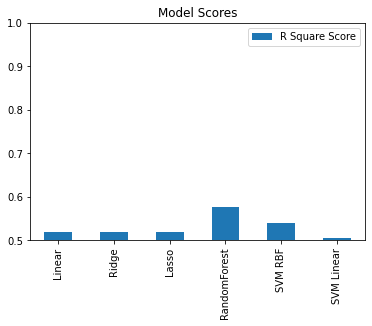

In [ ]:
# R2 Score (Without PCA)

def all_models(train,labels):
    results={}
    def test_model(clf):
        
        cv = KFold(n_splits=5,shuffle=True,random_state=45)
        r2 = make_scorer(r2_score)
        r2_val_score = cross_val_score(clf, train, labels, cv=cv,scoring=r2)
        scores=[r2_val_score.mean()]
        return scores

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["R Square Score"] 
    results.plot(kind="bar",title="Model Scores")
    axes = plt.gca()
    axes.set_ylim([0.5,1])
    return results

all_models(X_train,y_train)

,R Square Score
Linear,0.484906
Ridge,0.484921
Lasso,0.484905
RandomForest,0.502787
SVM RBF,0.525419
SVM Linear,0.475067


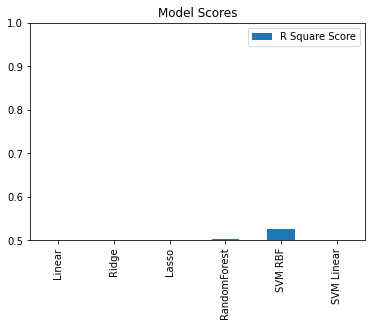

In [ ]:
all_models(dataPCA,y_train)